# Домашняя лабораторная работа №2 по вычислительной математике

Егоров Иван, Б01-008

## Задача X.9.9

In [18]:
import numpy as np
import matplotlib.pyplot as plt

A = 7.89 * 10 ** (-10)
B = 1.1 * 10 ** 7
C = 1.13 * 10 ** 3
M = 10 ** 6
T_k = 1000

y1_0 = 1.76 * 10 ** (-3)
y2_0 = 0
y3_0 = 0
y4_0 = 0

step = 0.01
t = np.arange(0, T_k, step)
y = np.array([y1_0, y2_0, y3_0, y4_0])

In [19]:
def jacobian(y):
    jacobians = list([])
    jacobians.append([-A - B * y[2], 0, -B * y[0], 0])
    jacobians.append([A, -M * C * y[2], -M * C * y[1], 0])
    jacobians.append([A - B * y[2], -M * C * y[2], -B * y[0] - M * C * y[1], C])
    jacobians.append([B * y[2], 0, B * y[0], -C])
    return np.array(jacobians)

In [20]:
def system(y):
    functions = list()
    functions.append(-A * y[0] - B * y[0] * y[2])
    functions.append(A * y[0] - M * C * y[1] * y[2])
    functions.append(A * y[0] - B * y[0] * y[2] - M * C * y[1] * y[2] + C * y[3])
    functions.append(B * y[0] * y[2] - C * y[3])
    return np.array(functions)

In [23]:
def SolveAndPrint(y, time, num):
    solution = np.array([[]]).reshape(-1, 4)
    solution = np.append(solution, [y], axis=0)

# constans from theory for this method
    a = 0.435866521508459
    p1 = a; p2 = 0.4782408332745185; p3 = 0.0858926452170225
    beta_21 = p1; beta_31 = p1; beta_32 = -2.116053335949811

# method
    E = np.zeros((4, 4))
    for i in range(0, 4):
        E[i][i] = 1

    for i in range(1, time):
        D = E - a * step * jacobian(y)
        k1 = np.linalg.solve(D, step * system(y))
        k2 = np.linalg.solve(D, step * system(y + beta_21 * k1))
        k3 = np.linalg.solve(D, step * system(y + beta_31 * k1 + beta_32 * k2))
        delta_y = p1 * k1 + p2 * k2 + p3 * k3
        y = y + delta_y
        solution = np.append(solution, [y], axis=0)

    plt.figure(figsize=[25, 10])
    plt.title(f'n(t) для реагента № {num+1}')
    plt.plot(t, solution[:,num], 'g.')
    plt.xlabel('Время, t', fontsize=20)
    plt.ylabel('Концентрация, n', fontsize=20)
    plt.grid()
    plt.show()

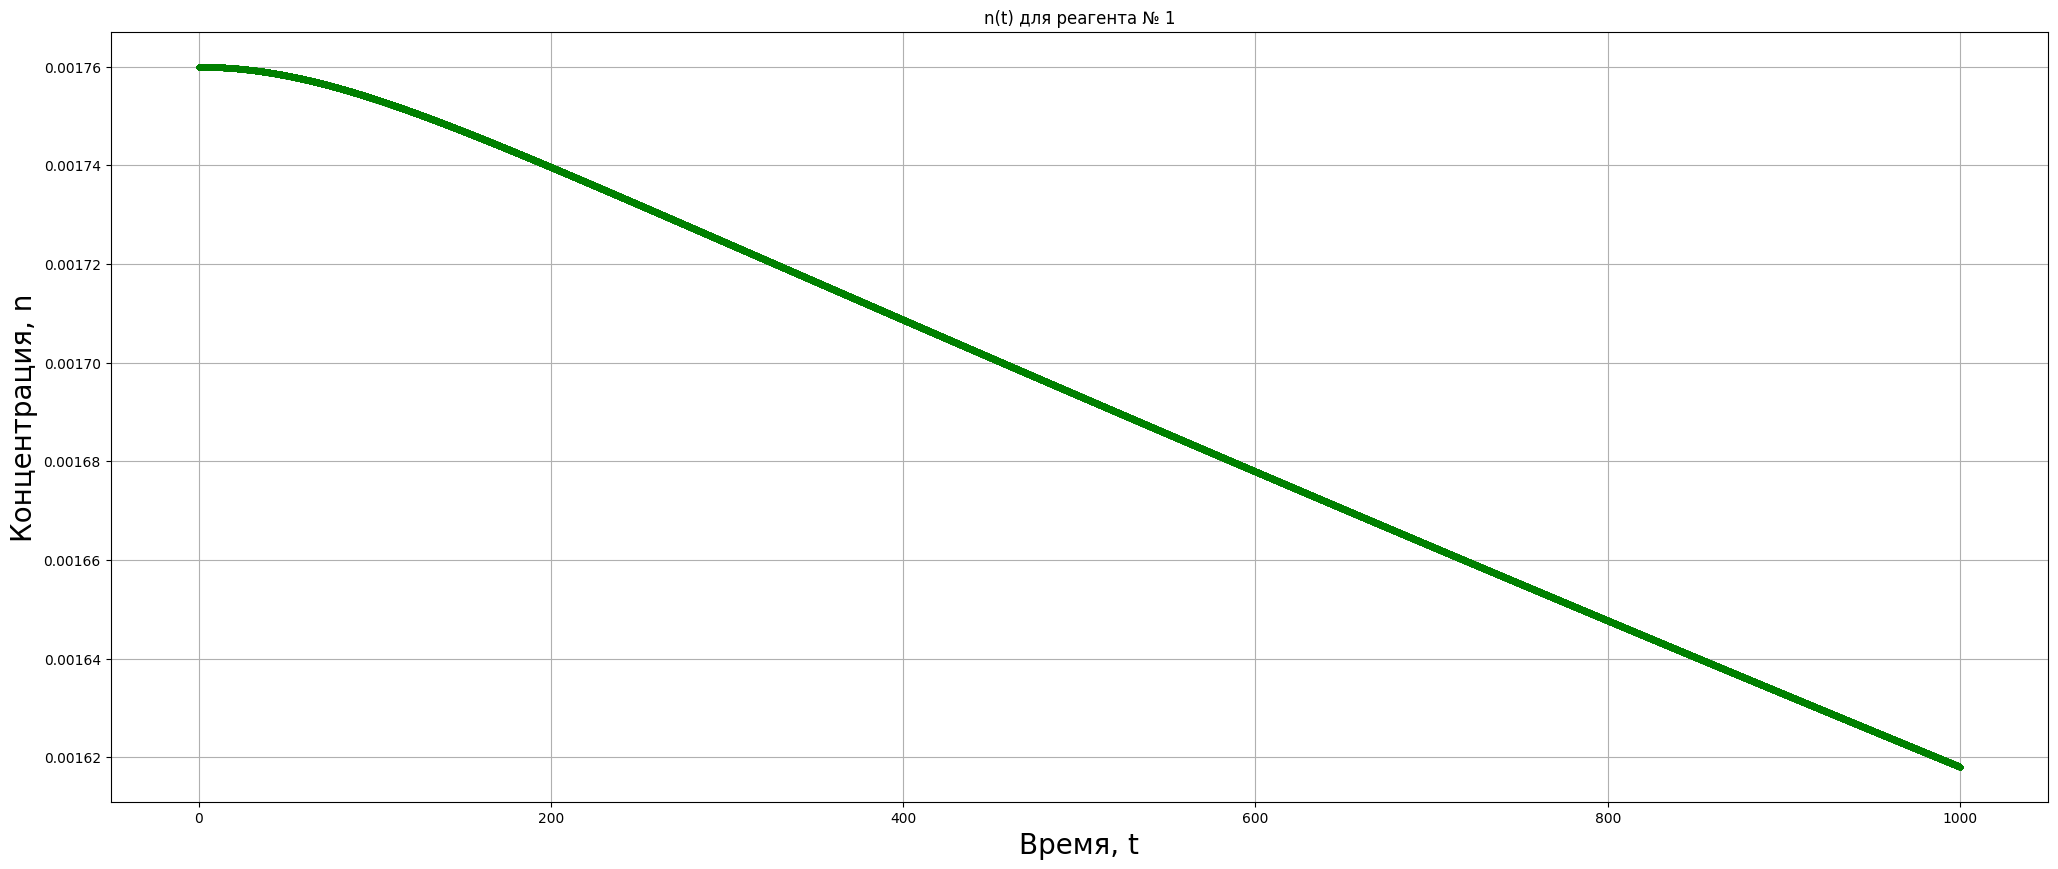

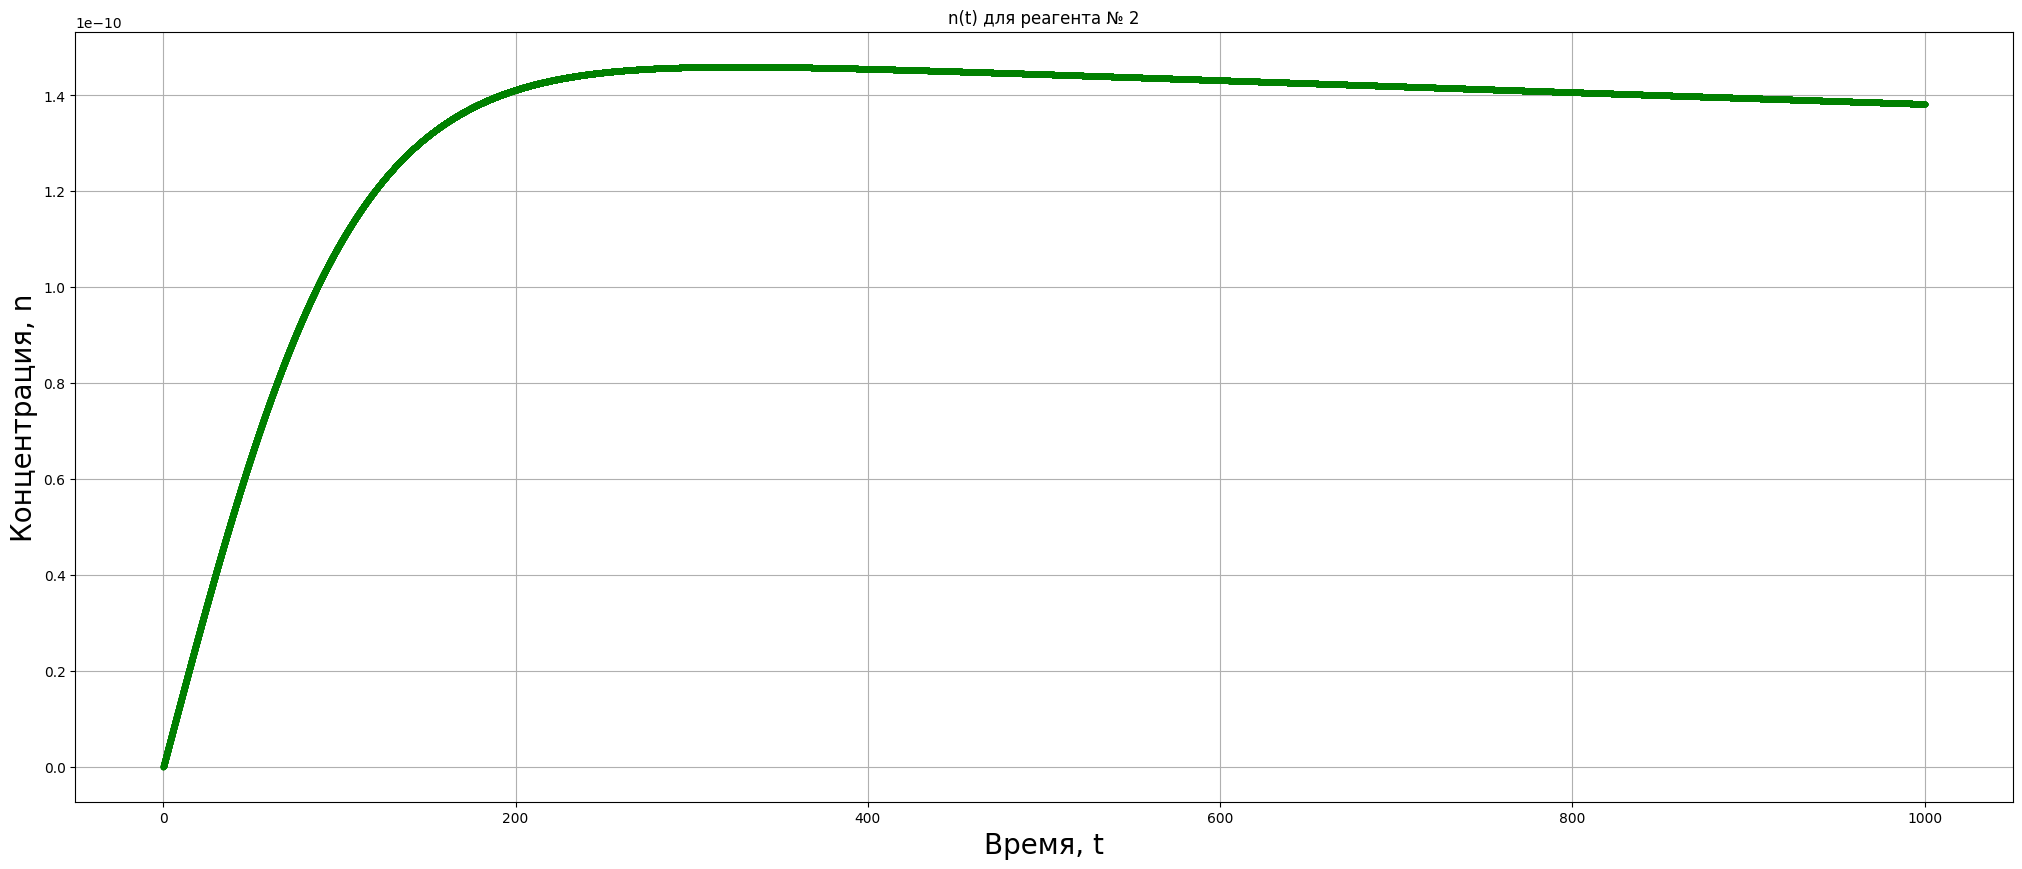

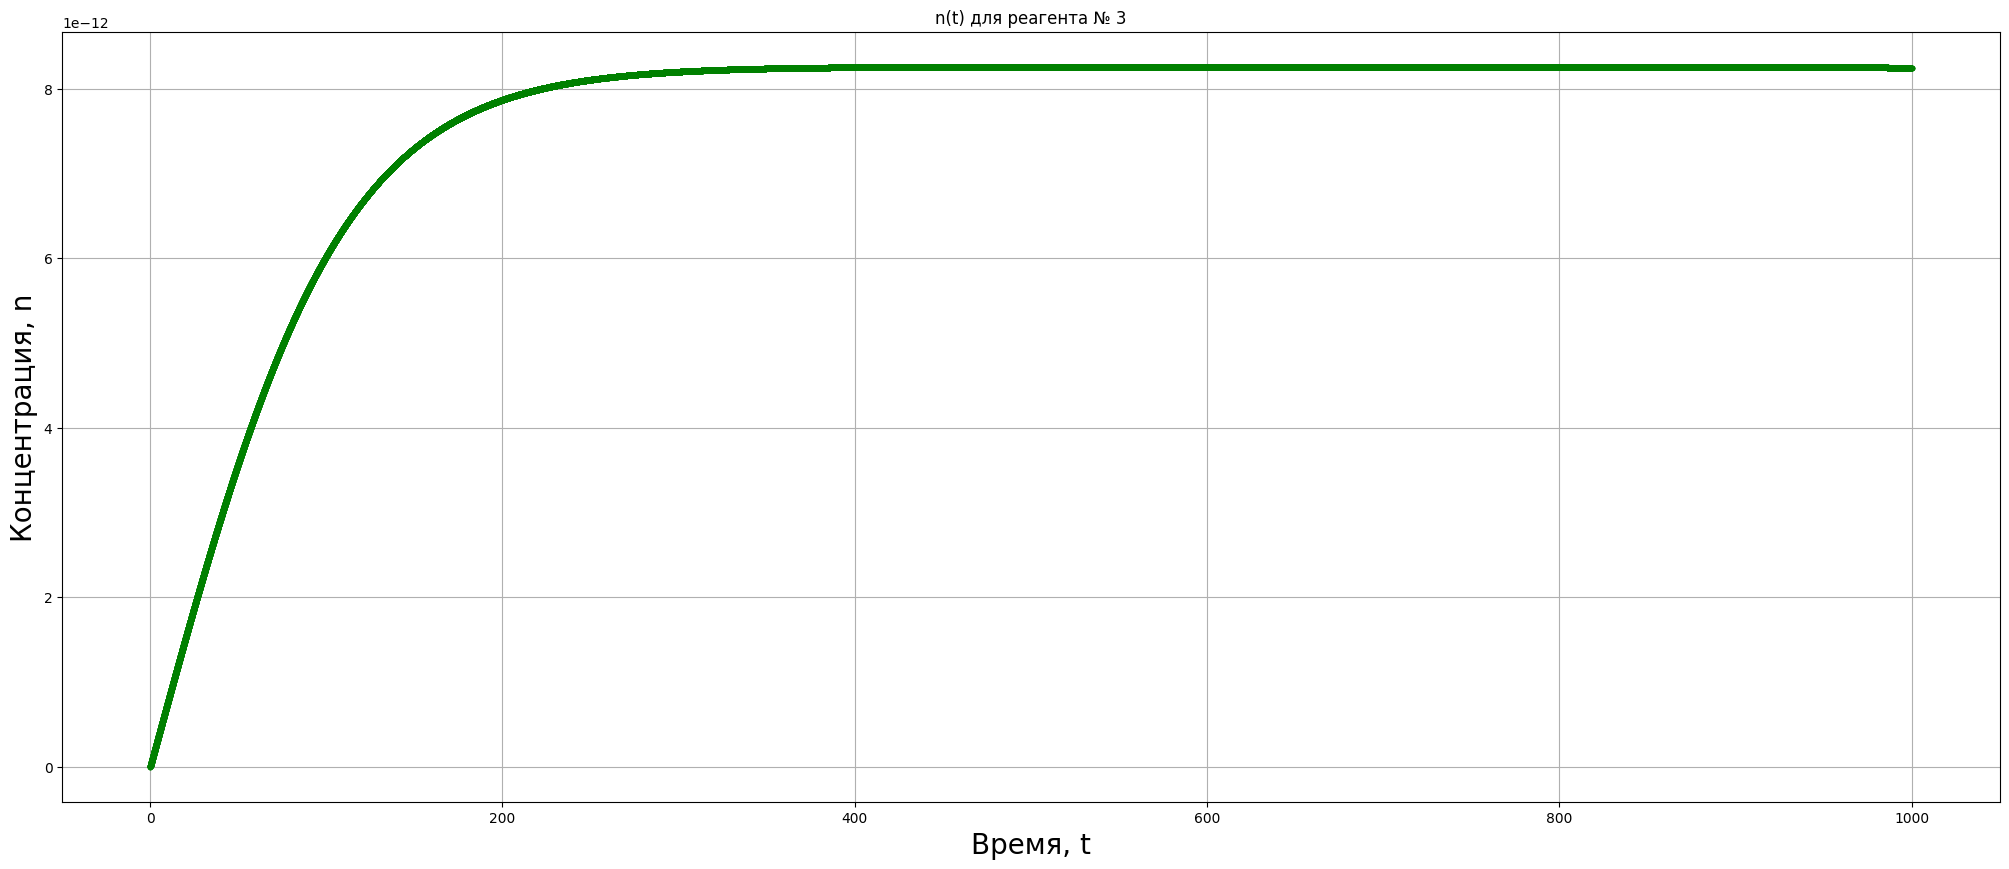

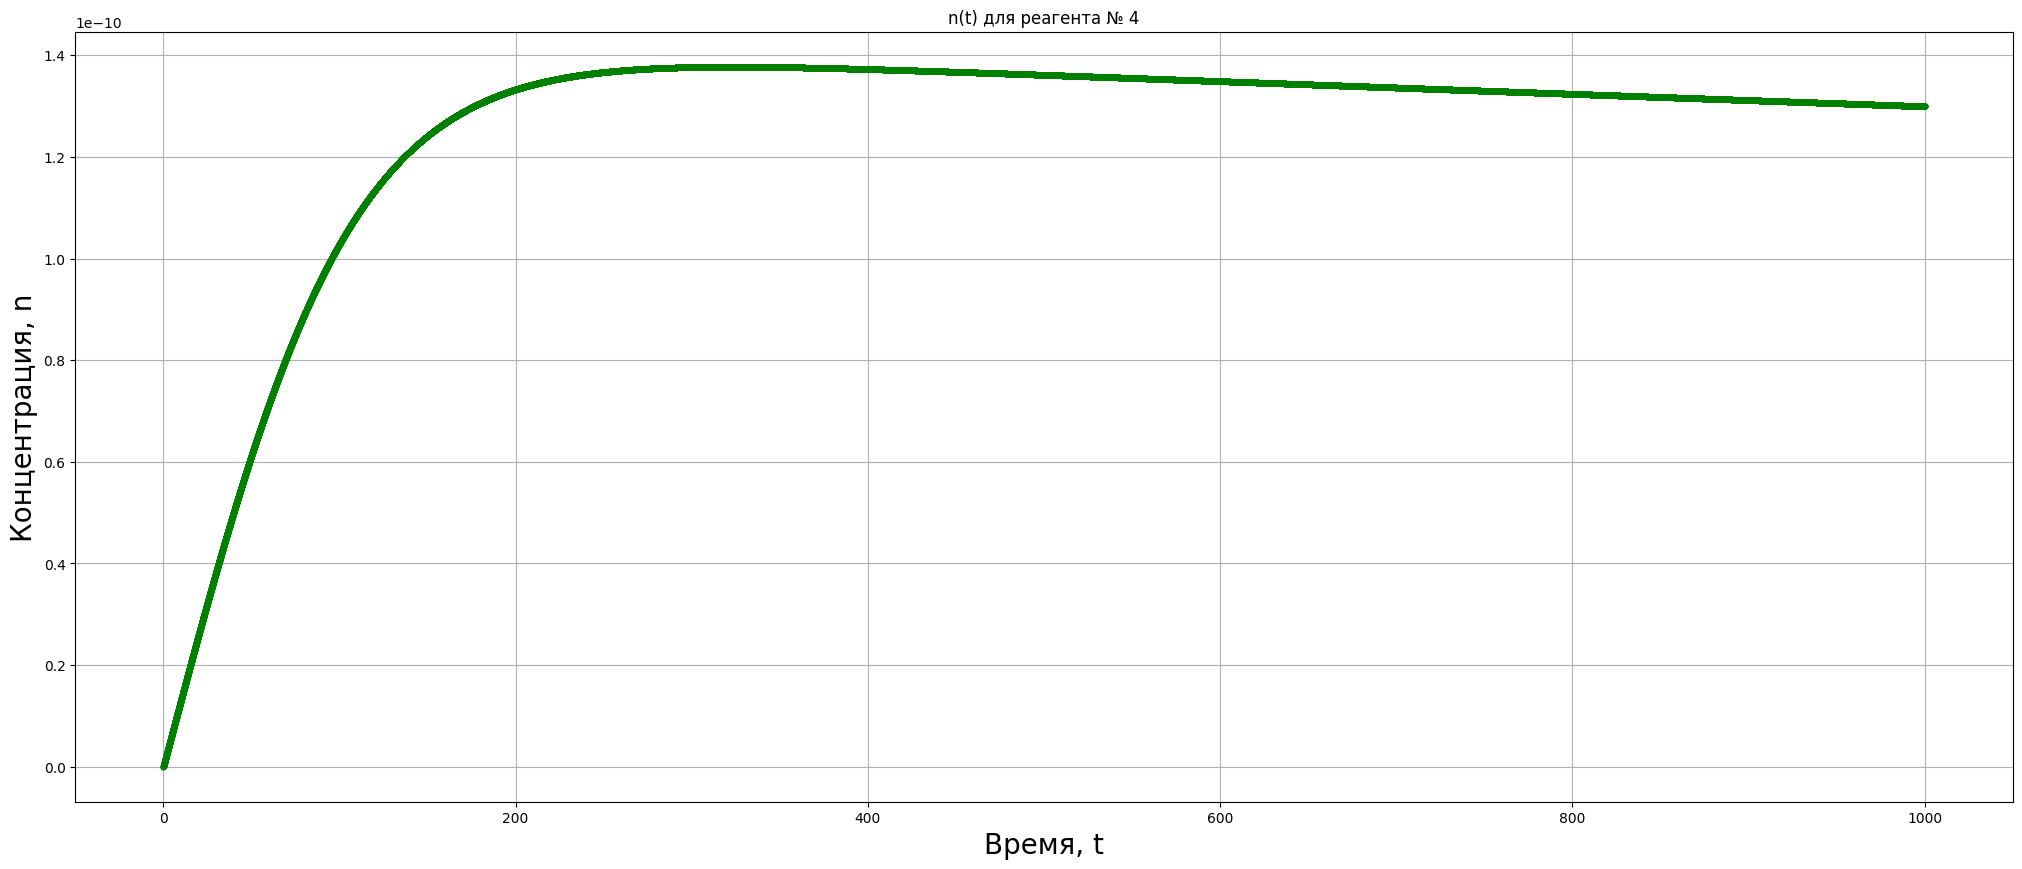

In [24]:
SolveAndPrint(y, len(t), 0)
SolveAndPrint(y, len(t), 1)
SolveAndPrint(y, len(t), 2)
SolveAndPrint(y, len(t), 3)